<a href="https://colab.research.google.com/github/piziomo/Data-Science/blob/main/Clustering/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Wine dataset

As with previous exercises, fill in the question marks with the correct code.

Last week you were introduced to the [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality). We have 10 input variables and 1 output variables.

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality (score between 0 and 10)

I suggest we look at two broad questions with this dataset:

1. Will dimension reduction reveal variable groupings? Think back to how we interpreted the loadings in the crime dataset.
2. What does clustering the wines well us?

## Load data and import libraries

In [2]:
#| error: true

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import TSNE

df = pd.read_excel('/content/winequality-red_v2.xlsx')

In [ ]:
#| error: true
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


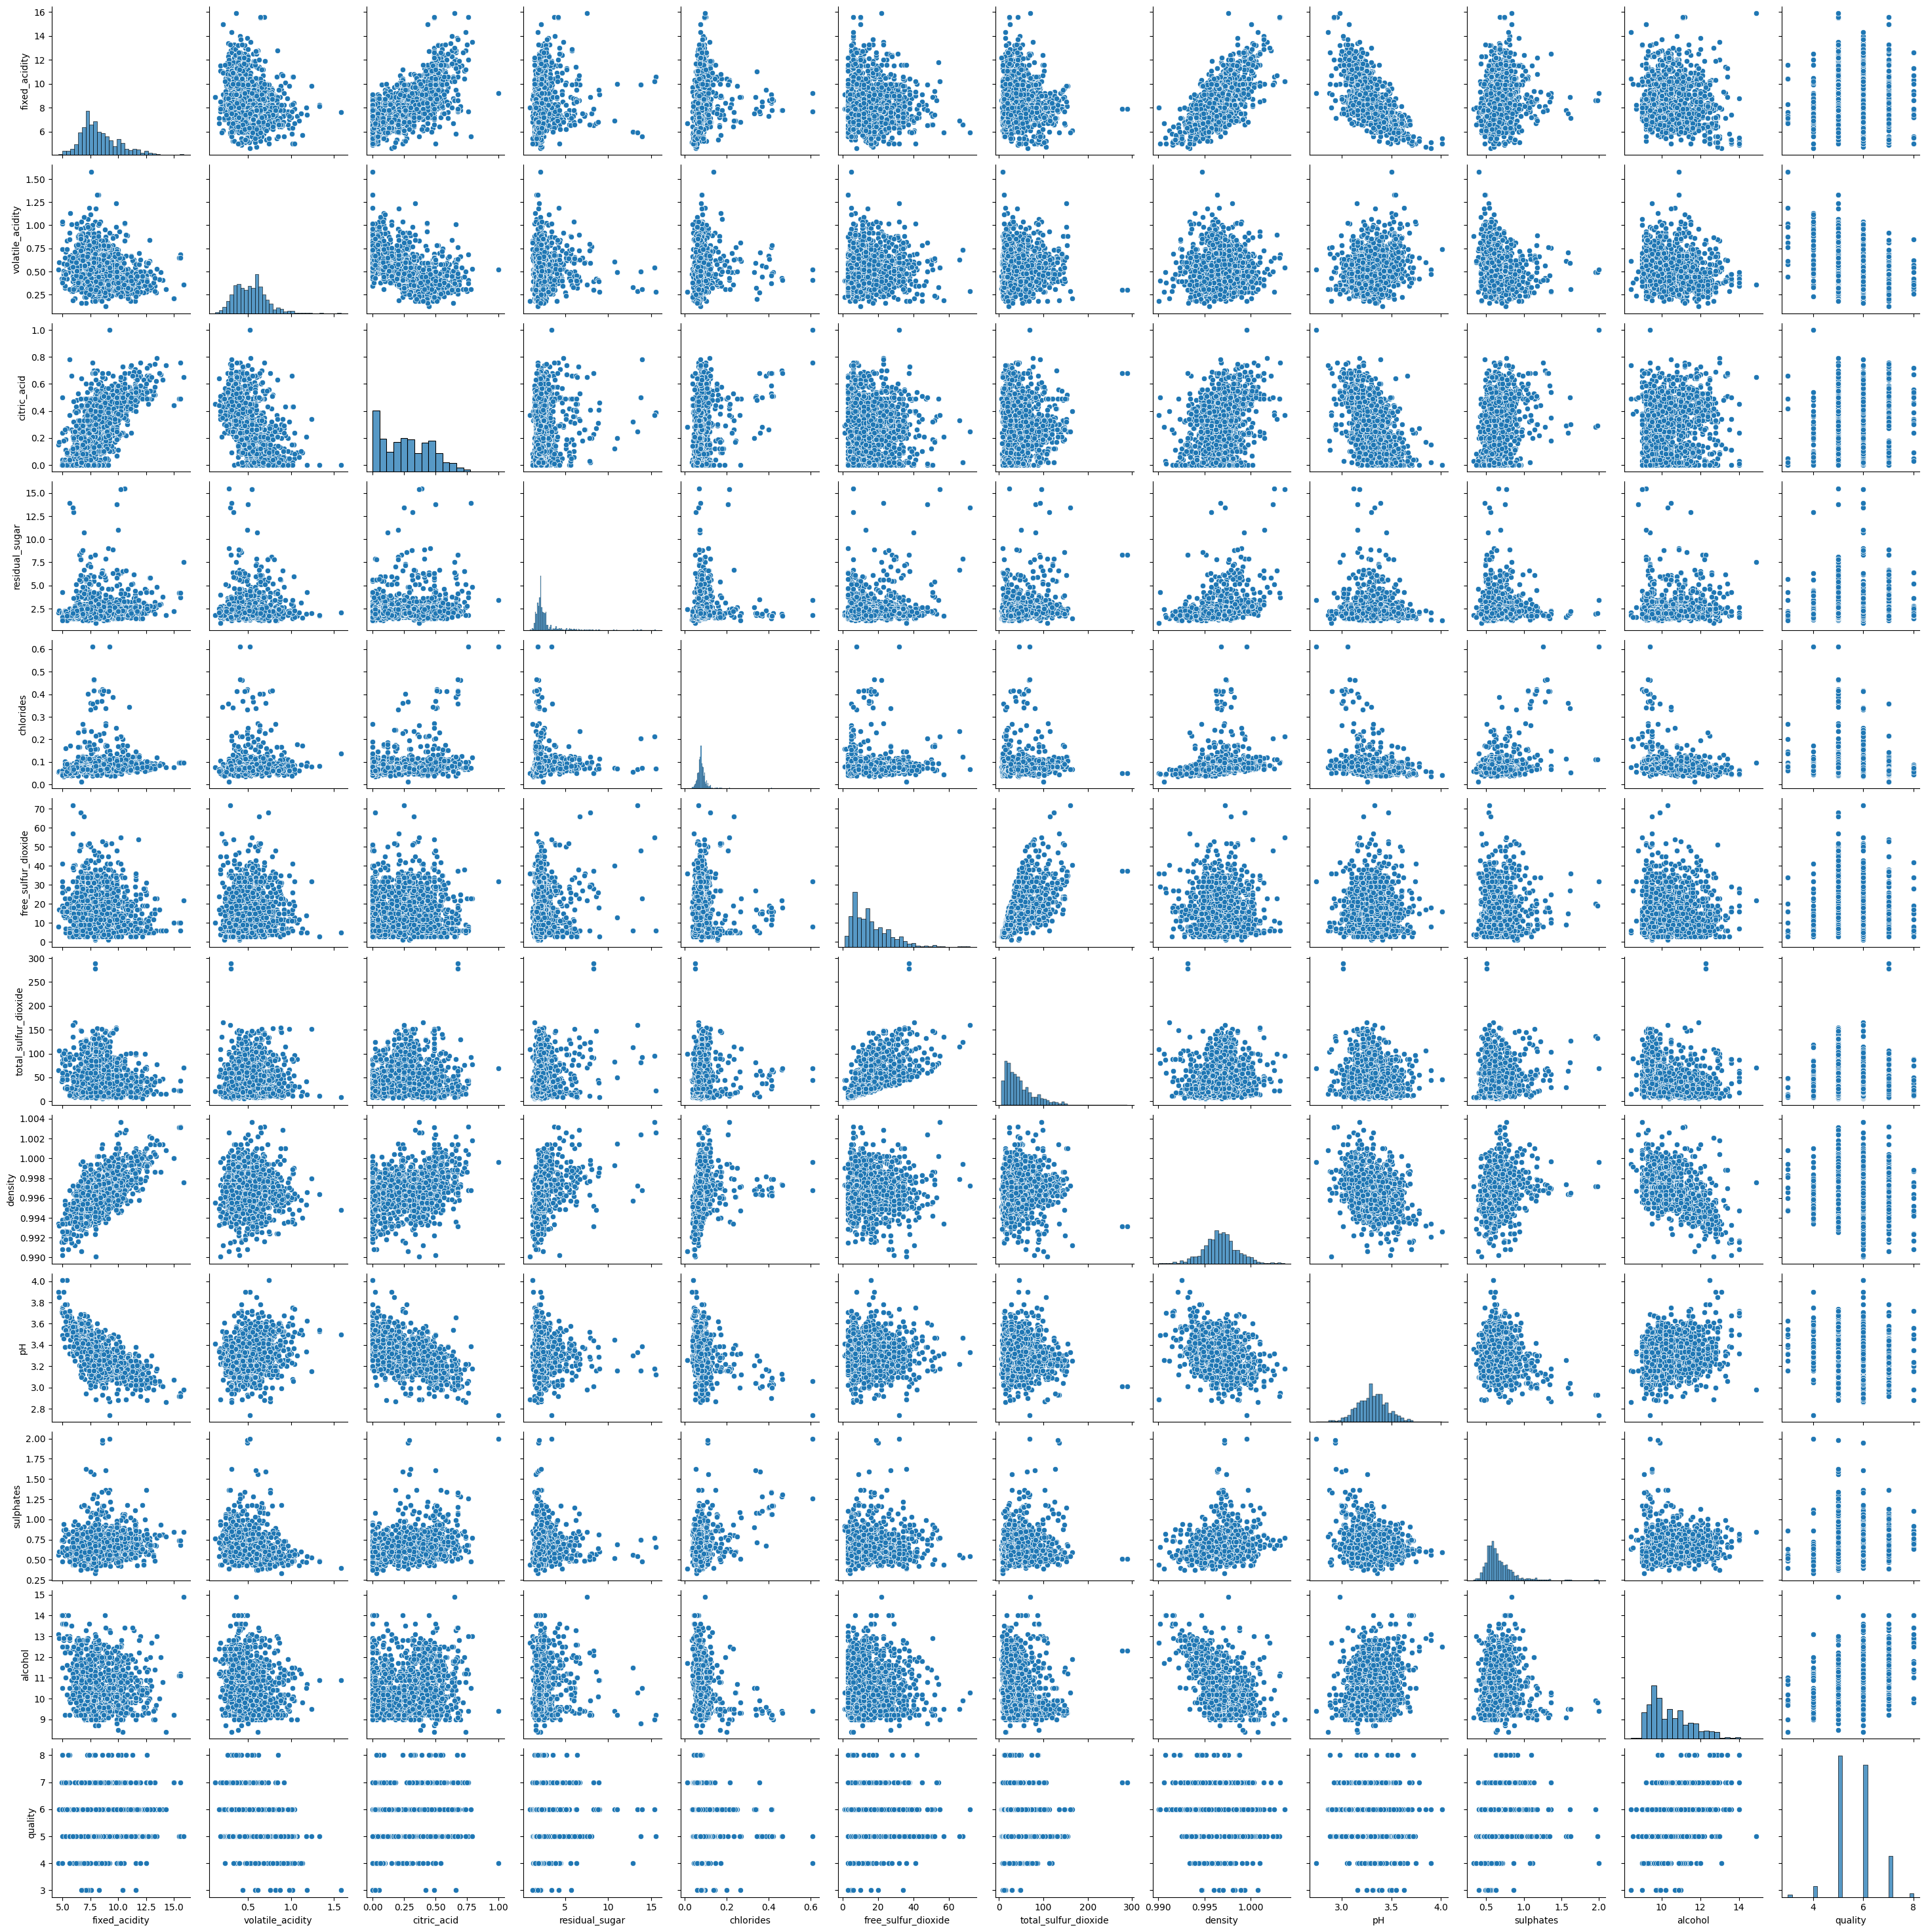

In [3]:
#| error: true

# May take a while depending on your computer
# feel free not to run this
sns.pairplot(df)

# Normalisation

Before you carry out any operation, you might want to perform some normalisation. This will ensure that some of the assumptions that the algorithms are making are met and also the results are not biased/determined by the different value ranges and variation ranges inherent in the data.

Do try out the following steps **without** normalisation first and then come back to this, normalise the data and see the differences it makes using a **normalised** copy of the data.

In [4]:
#| error: true

from sklearn.preprocessing import MinMaxScaler

# first save the column names, we will create a new dataset with the scaled data
col_names = df.columns

# This is the normalization function.
# We are using the MinMaxScaler which brings all the data between 0 and 1.
# Make use of other transformations offered by scikitlearn, experiment, note changes.

# The last column of the data contains the "quality" labels/scores, we don't want to normalize them
# as they is sort of the "dependent (or "target") variable and there is meaning in these scores.
# Let's normalize the first 11 columns which are our "independent" columns.
scaled_df =  pd.DataFrame(MinMaxScaler().fit_transform(df.iloc[:, 0:11]))

# now we want to add the "quality" values back in. We'll need them.
scaled_df = scaled_df.join(df.iloc[:, 11:12])

# now we name the columns with the original column names. We do this because MinMaxScaler
# produces a data frame with no column names (don't ask me why..)
scaled_df.columns = col_names

# let's have a look at what the data is looking like:
scaled_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


**Important note:** The rest of the code will continue to use the **non-normalised** version of the data. For now, just carry on with that and try running the operations with the non-normalised version. Once you are through and/or somewhere in the middle, try them out with the **normalised** data. See what this will change.

# Dimension reduction

In [5]:
#| error: true

from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
df_pca = pca.fit(df.iloc[:, 0:11])

In [6]:
#| error: true

df_pca_vals = df_pca.fit_transform(df.iloc[:, 0:11])
df['c1'] = [item[0] for item in df_pca_vals]
df['c2'] = [item[1] for item in df_pca_vals]

<Axes: xlabel='c1', ylabel='c2'>

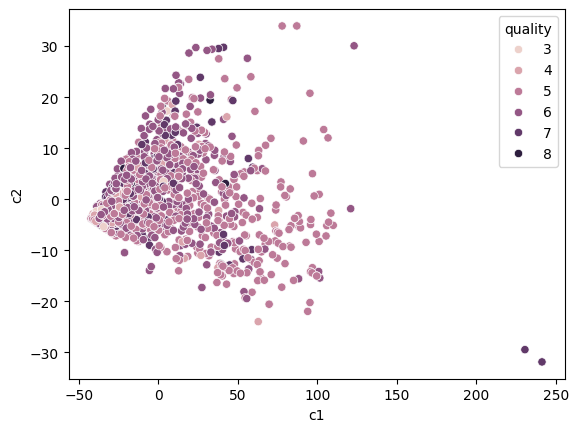

In [7]:
#| error: true

sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'quality')

In [8]:
#| error: true

print(df.columns)
df_pca.components_

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'c1', 'c2'],
      dtype='object')


array([[-6.13247431e-03,  3.84465551e-04,  1.70902595e-04,
         8.64894648e-03,  6.37307290e-05,  2.18857434e-01,
         9.75678369e-01,  3.72498542e-06, -2.68008619e-04,
         2.23381730e-04, -6.35846721e-03],
       [-2.38994985e-02, -2.00966661e-03, -3.03480788e-03,
         1.11348551e-02, -2.36654751e-04,  9.75265982e-01,
        -2.18916841e-01, -2.49998510e-05,  3.27182194e-03,
         6.18926046e-04,  1.45642451e-02]])

What about other dimension reduction methods?

## SparcePCA

In [10]:
#| error: true

s_pca = SparsePCA(n_components=n_components)
df_s_pca = s_pca.fit(df.iloc[:, 0:11])

In [12]:
#| error: true

df_s_pca_vals = s_pca.fit_transform(df.iloc[:, 0:11])
df['c1 spca'] = [item[0] for item in df_s_pca_vals]
df['c2 spca'] = [item[1] for item in df_s_pca_vals]

<Axes: xlabel='c1 spca', ylabel='c2 spca'>

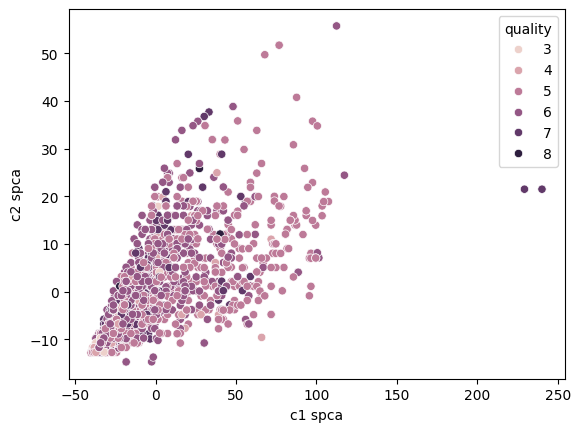

In [13]:
#| error: true

sns.scatterplot(data = df, x = 'c1 spca', y = 'c2 spca', hue = 'quality')

## tSNE

In [14]:
#| error: true

tsne_model = TSNE(n_components=n_components)
df_tsne = tsne_model.fit(df.iloc[:, 0:11])

In [15]:
#| error: true

df_tsne_vals = tsne_model.fit_transform(df.iloc[:, 0:11])
df['c1 tsne'] = [item[0] for item in df_tsne_vals]
df['c2 tsne'] = [item[1] for item in df_tsne_vals]

<Axes: xlabel='c1 tsne', ylabel='c1 tsne'>

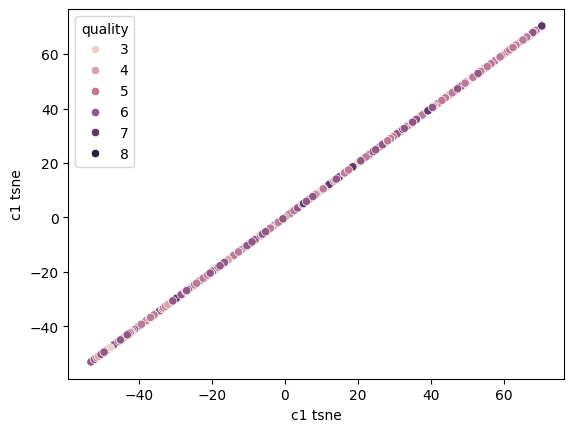

In [16]:
#| error: true

# This plot does not look right
# I am not sure why.
sns.scatterplot(data = df, x = 'c1 tsne', y = 'c1 tsne', hue = 'quality')

That looks concerning - there is a straight line. It looks like something in the above code might not be correct.

Can you find out what that might be?

**Hint:** think about when you would get a straight line in a scatterplot?

Once you fixed the error above, you will notice a different structure to the ones you observed in the PCA runs. There isn't really a clear next step which of these projections one should adopt.

For now, we will use PCA components. PCA would be a good choice if the interpretability of the components is important to us. Since PCA is a linear projection method, the components carry the weights of each raw feature which enable us to make inferences about the axes. However, if we are more interested in finding structures and identify groups of similar items, t-SNE might be a better projection to use since it emphasises proximity but the axes don't mean much since the layout is formed stochastically (fancy speak for saying that there is randomness in the algorithm and the layout will be different each time your run it).

In [19]:
#| error: true

data = {'columns' : df.iloc[:, 0:11].columns,
        'component 1' : df_pca.components_[0],
        'component 2' : df_pca.components_[1]}


loadings = pd.DataFrame(data)
loadings_sorted = loadings.sort_values(by=['component 1'], ascending=False)
loadings_sorted.iloc[1:10,:]

,columns,component 1,component 2
5,free_sulfur_dioxide,0.218857,0.975266
3,residual_sugar,0.008649,0.011135
1,volatile_acidity,0.000384,-0.002010
9,sulphates,0.000223,0.000619
2,citric_acid,0.000171,-0.003035
4,chlorides,0.000064,-0.000237
7,density,0.000004,-0.000025
8,pH,-0.000268,0.003272
0,fixed_acidity,-0.006132,-0.023899


In [20]:
#| error: true

loadings_sorted = loadings.sort_values(by=['component 2'], ascending=False)
loadings_sorted.iloc[1:10,:]

,columns,component 1,component 2
10,alcohol,-0.006358,0.014564
3,residual_sugar,0.008649,0.011135
8,pH,-0.000268,0.003272
9,sulphates,0.000223,0.000619
7,density,0.000004,-0.000025
4,chlorides,0.000064,-0.000237
1,volatile_acidity,0.000384,-0.002010
2,citric_acid,0.000171,-0.003035
0,fixed_acidity,-0.006132,-0.023899


## Clustering

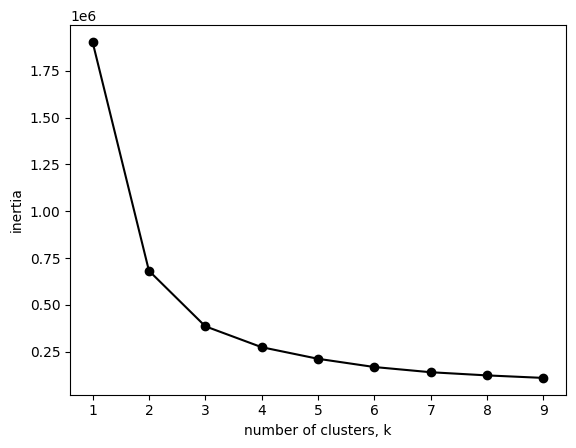

In [22]:
#| error: true

from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df[['c1', 'c2']])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [28]:
#| error: true

k_means_3 = KMeans(n_clusters = 3, init = 'random')
k_means_3.fit(df[['c1', 'c2']])
df['Three clusters'] = pd.Series(k_means_3.labels_, index = df.index)

<Axes: xlabel='c1', ylabel='c2'>

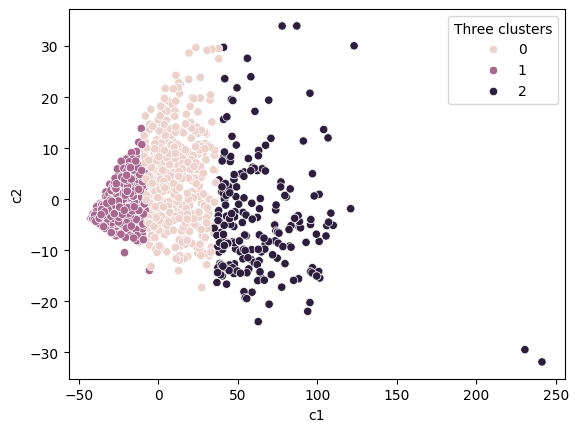

In [29]:
#| error: true

sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Three clusters')

Consider:

* Is that useful?
* What might it mean?

Outside of this session go back to normalising the data and try out different methods for normalisation as well (e.g., centering around the mean), clustering the raw data (and not the projections from PCA), trying to get tSNE working or using different numbers of components.